<a href="https://colab.research.google.com/github/irajamuller/quantum_computing/blob/main/Teletransporte_Qu%C3%A2ntico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet

In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_bloch_multivector, plot_histogram
import qiskit.quantum_info as qi

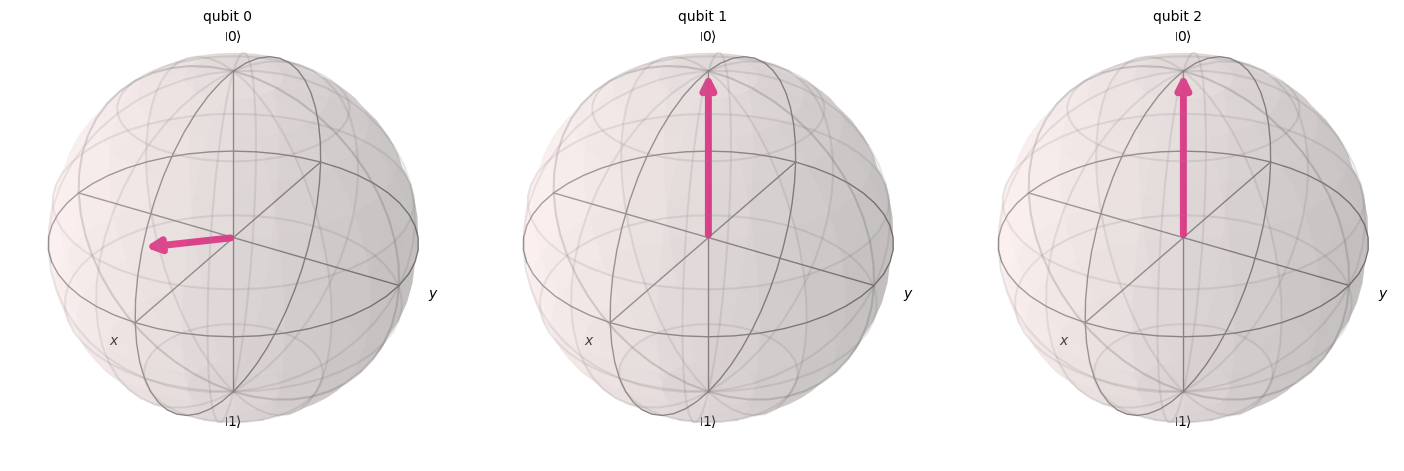

In [10]:
q0 = QuantumRegister(1, name='to teleport (alice)')
q1 = QuantumRegister(1, name='alice')
q2 = QuantumRegister(1, name='bob')
c0z = ClassicalRegister(1, name='i')
c1x = ClassicalRegister(1, name='j')

qc = QuantumCircuit(q0, q1, q2, c0z, c1x)
# Teletransporte de um estado
qc.initialize([np.sqrt(0.7), np.sqrt(0.3)], q0)
qc.barrier()

plot_bloch_multivector(qi.Statevector(qc))

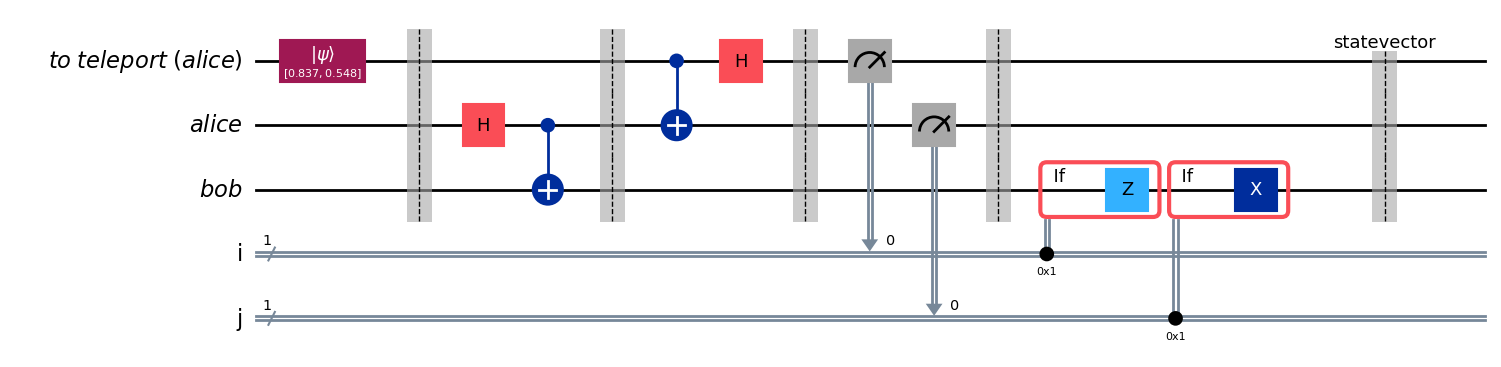

In [11]:
# Emaranhar - canal de comunicação entre Alice e Bob |00>
# Bell State
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Medida de Bell
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Faz a medição
qc.measure(0, c0z)
qc.measure(1, c1x)
qc.barrier()

# LIGA PARA O BOB COMUNICANDO AS MEDIDAS

# Bob faz as correções
# Bit 0
with qc.if_test((c0z, 1)):
    qc.z(2)
# Bit 1
with qc.if_test((c1x, 1)):
    qc.x(2)

qc.save_statevector()

qc.draw('mpl')

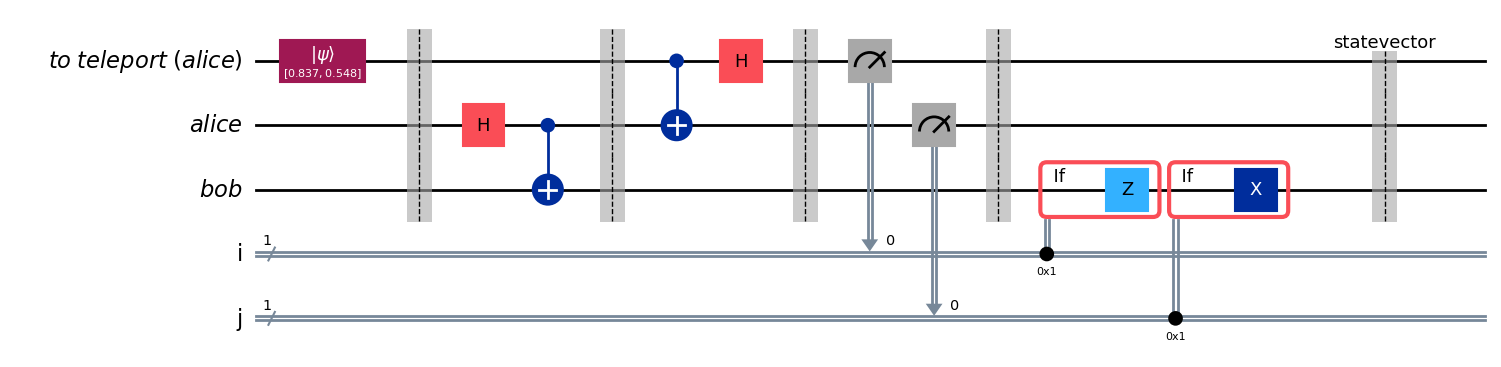

In [12]:
backend = AerSimulator()
qc_t = transpile(qc, backend)
qc_t.draw('mpl')

In [13]:
job = backend.run(qc_t, shots=1000)
result = job.result()
state = result.get_statevector(qc_t)
array_to_latex(state)

<IPython.core.display.Latex object>

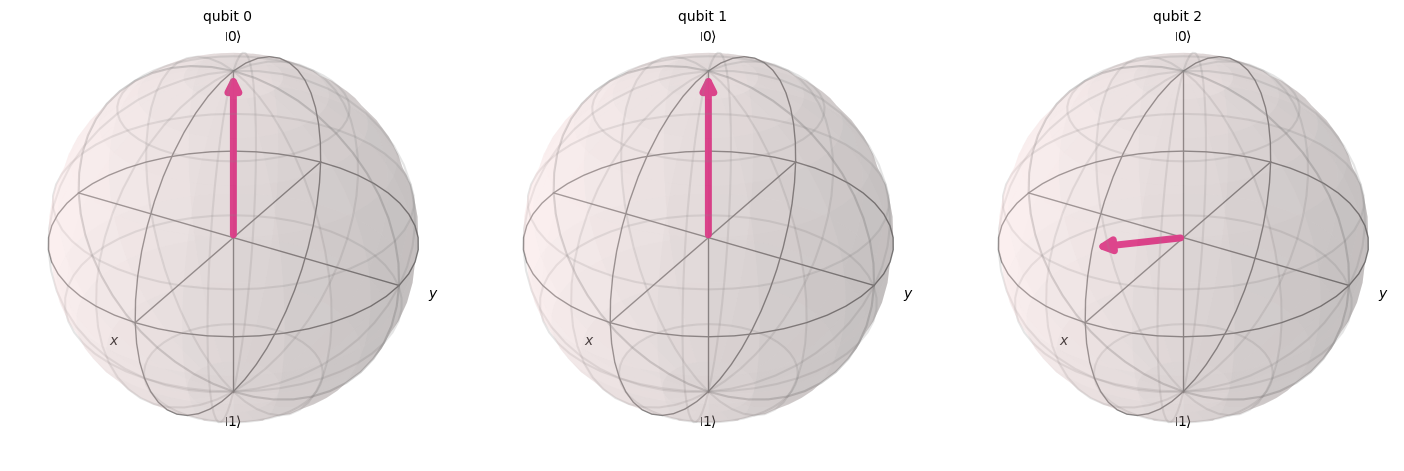

In [14]:
plot_bloch_multivector(state)